<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/spambase_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/data_mining')
print(os.getcwd())

/content/drive/My Drive/data_mining


##SpamBase Dataset

For all three classification techniques we will use spambase dataset

###Import the libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

###load and prepare the data


In [4]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',
     header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


###Rename Variables
* Assign a name to all attributes as x0 , x1, ... , X56.
* Assign y to the class variable (the last column of df).
* Display the first 5 rows.

In [7]:
df.columns=["X"+str(i) for i in range(0,len(df.columns)-1)]+['y']

df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


###Split the data using train test split


In [8]:
X=df.drop('y',axis=1)
y=df["y"]

X_trn,X_tst,y_trn,y_tst=train_test_split(
    X,
    y,
    test_size=.30,
    random_state=42
)

#Create training dataset
trn=X_trn
trn['y']=y_trn
#Create testing dataset
tst=X_tst
tst['y']=y_tst

###Explore the training data


#### Bar Plot of class variable
use seaborn's countplot() function to create the bar plot

/tmp/ipython-input-2641161295.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',data=trn,palette=["darkblue","orange"])


<Axes: xlabel='y', ylabel='count'>

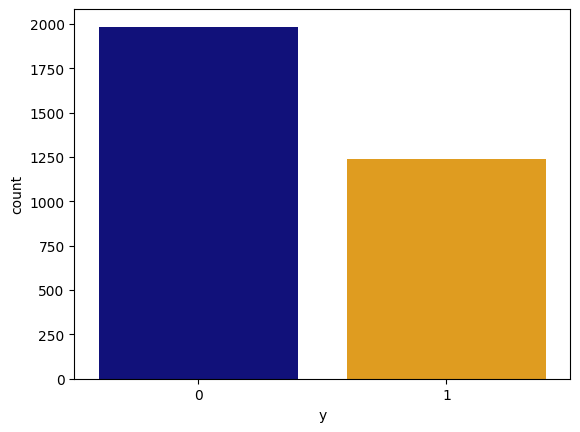

In [13]:
sns.countplot(x='y',data=trn,palette=["darkblue","orange"])

###Explore attribute variables
select 4 arbitrary features to get paired plots

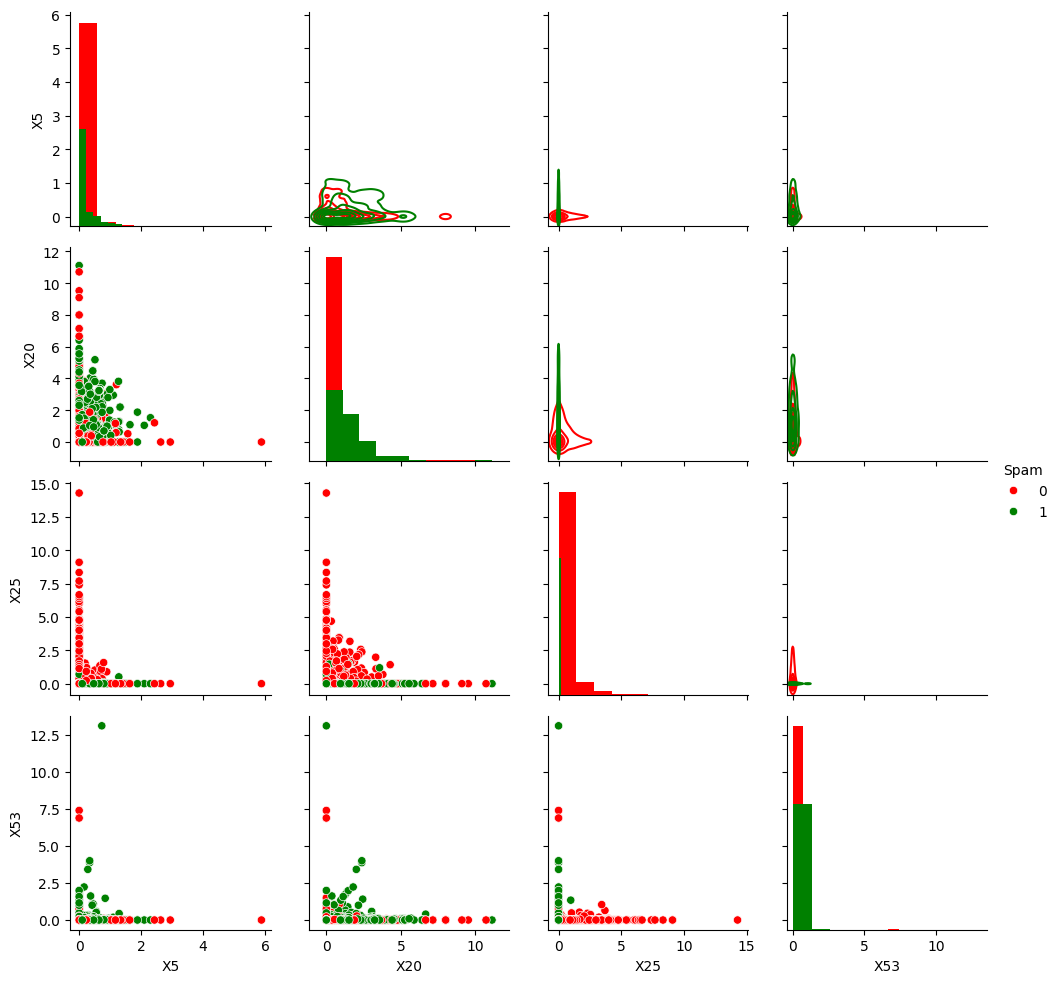

In [16]:
# Create a PairGrid
g = sns.PairGrid(
    trn,
    vars=['X5', 'X20', 'X25', 'X53'],
    hue='y',
    diag_sharey=False,
    palette=['red', 'green']
)

# Histograms on the diagonal
g.map_diag(plt.hist)

# KDE plots above the diagonal
g.map_upper(sns.kdeplot)

# Scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Add legend
g.add_legend(title='Spam')


###Save the data

In [17]:
df.to_csv('data/spambase.csv', sep=',', index=False)
trn.to_csv('data/spambase_trn.csv', sep=',', index=False)
tst.to_csv('data/spambase_tst.csv', sep=',', index=False)